# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Python Course/Datasets/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [ ]:
#Checking data types in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

1 float, 25 integer, and 3 object data types. Will need to check the missing data in the Income column. Will need to change the Education, Marital_Status, and Dt_Customer data to numerical values.

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
#Checking mean, std, etc.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [ ]:
# Minimum value for birthyear is suspect. Checking for other sus values
data[data["Year_Birth"]<1925] #chose 1925 since that would mean customer would be 100 years old

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [ ]:
#Dropping the above 3 rows from the data set
data=data.drop(data[data['Year_Birth']<1925].index)

##### **Observations:**
The average household income is $52,247.25.

There are three (3) entries that have a suspicious birth year (before 1940). For the two customers born in 1893 and 1899, I'm guessing it is just a typo in the birth year. I decided to just outright delete those three rows as they will have a minimal impact to the overall dataset.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
#Checking for missing values. Could also check above with data.info() and seeing ID non-null values is lower than number of rows in the dataset. Exact number easy to see with below code
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
#checking details of Income columns with no values
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [ ]:
#Replacing non-null Income values with Income mean
data = data.replace(np.nan, data['Income'].mean())

In [ ]:
#Double-checking general dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   int64 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2237.0,5590.726419,3245.118591,0.0,2829.0,5455.0,8427.0,11191.0
Year_Birth,2237.0,1968.901654,11.701917,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2237.0,52236.581563,25043.111823,1730.0,35523.0,51717.0,68281.0,666666.0
Kidhome,2237.0,0.444345,0.538467,0.0,0.0,0.0,1.0,2.0
Teenhome,2237.0,0.506482,0.544593,0.0,0.0,0.0,1.0,2.0
Recency,2237.0,49.104604,28.956073,0.0,24.0,49.0,74.0,99.0
MntWines,2237.0,303.995530,336.574382,0.0,24.0,174.0,504.0,1493.0
MntFruits,2237.0,26.270451,39.715972,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2237.0,166.916853,225.661158,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2237.0,37.523022,54.639909,0.0,3.0,12.0,50.0,259.0


##### **Observations:**

There are missing values for Income; 24 , to be exact. I replaced those missing values with the mean income for each. Minimal change to the Income mean before and after changes.

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
#Dropping ID column since keeping it will make it more difficult to analyze the rest of the data
data=data.drop(['ID'], axis=1)

In [ ]:
#changing Dt_Customer from object to date format. This will make it easier to visualize it in the Histograms below.
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
#Checking unique entries for Education column
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#Changing Education values to numerical values
data['Education']=data['Education'].replace({
    'Basic':0,
    '2n Cycle':1,
    'Graduation':2,
    'Master':3,
    'PhD':4})

In [ ]:
#Checking Marital Status values
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#Changing Marital Status values to numerical values
data['Marital_Status']=data['Marital_Status'].replace({
    'Single':0,
    'Together':1,
    'Married':2,
    'Divorced':3,
    'Widow':4,
    'Alone':5,
    'Absurd':6,
    'YOLO':7,
})

In [ ]:
#checking for duplicates
data[data.duplicated()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
83,1963,3,1,38620.0,0,0,2013-05-11,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0
179,1951,1,2,78497.0,0,0,2013-12-01,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,3,11,0
281,1976,2,1,51369.0,0,1,2012-10-25,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,3,11,0
282,1946,2,1,37760.0,0,0,2012-08-31,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
363,1978,4,2,37717.0,1,0,2012-11-23,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,3,11,0
383,1973,1,2,35688.0,2,1,2012-08-22,94,73,3,90,12,1,32,7,4,1,4,8,0,0,0,0,0,0,3,11,0
421,1983,2,2,30096.0,1,0,2014-05-22,30,5,3,11,12,5,9,1,2,0,3,6,0,0,0,0,0,0,3,11,0
443,1989,2,0,30279.0,1,0,2012-12-30,13,10,4,14,4,4,1,1,1,0,3,8,0,0,0,0,0,0,3,11,0
463,1963,2,2,80124.0,0,0,2014-06-26,47,483,84,398,205,84,241,1,3,7,8,1,1,0,0,0,0,0,3,11,0
504,1956,3,1,50943.0,0,1,2013-06-21,49,31,0,7,2,0,6,1,1,0,3,5,0,0,0,0,0,0,3,11,0


In [ ]:
#removing duplicates
data=data[~data.duplicated()]

In [ ]:
data=data.drop('Z_CostContact', axis=1)
data=data.drop('Z_Revenue', axis=1)

In [ ]:
#re-checking dataset
data.shape

(2055, 26)

In [ ]:
#re-checking various data stats
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Year_Birth,2055.0,1968.891484,1940.0,1959.0,1970.0,1977.0,1996.0,11.666261
Education,2055.0,2.46472,0.0,2.0,2.0,3.0,4.0,1.005146
Marital_Status,2055.0,1.498783,0.0,1.0,2.0,2.0,7.0,1.080893
Income,2055.0,52345.047181,1730.0,35694.5,52034.0,68211.0,666666.0,25383.855716
Kidhome,2055.0,0.445742,0.0,0.0,0.0,1.0,2.0,0.53763
Teenhome,2055.0,0.509489,0.0,0.0,0.0,1.0,2.0,0.54655
Dt_Customer,2055,2013-07-11 07:26:21.897810176,2012-07-30 00:00:00,2013-01-17 00:00:00,2013-07-12 00:00:00,2014-01-01 00:00:00,2014-06-29 00:00:00,NaN
Recency,2055.0,48.946472,0.0,24.0,49.0,74.0,99.0,28.992277
MntWines,2055.0,303.986861,0.0,23.0,174.0,504.0,1493.0,336.503064
MntFruits,2055.0,26.2,0.0,1.0,8.0,33.0,199.0,39.688041


##### **Observations:**

1. Education and Marital_Status, are both strings, so I converted them to a numerical (int) value.
2. The date format was also a string value, so I changed that to dd-mm-yy format, as well. I have a feeling I might have to drop that column later.
3. I removed the ID category since keeping it will make it more difficult to analyze the rest of the data.
4. Ran the appropriate code to find any and all duplicate data. There were 182 duplicate rows removed.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

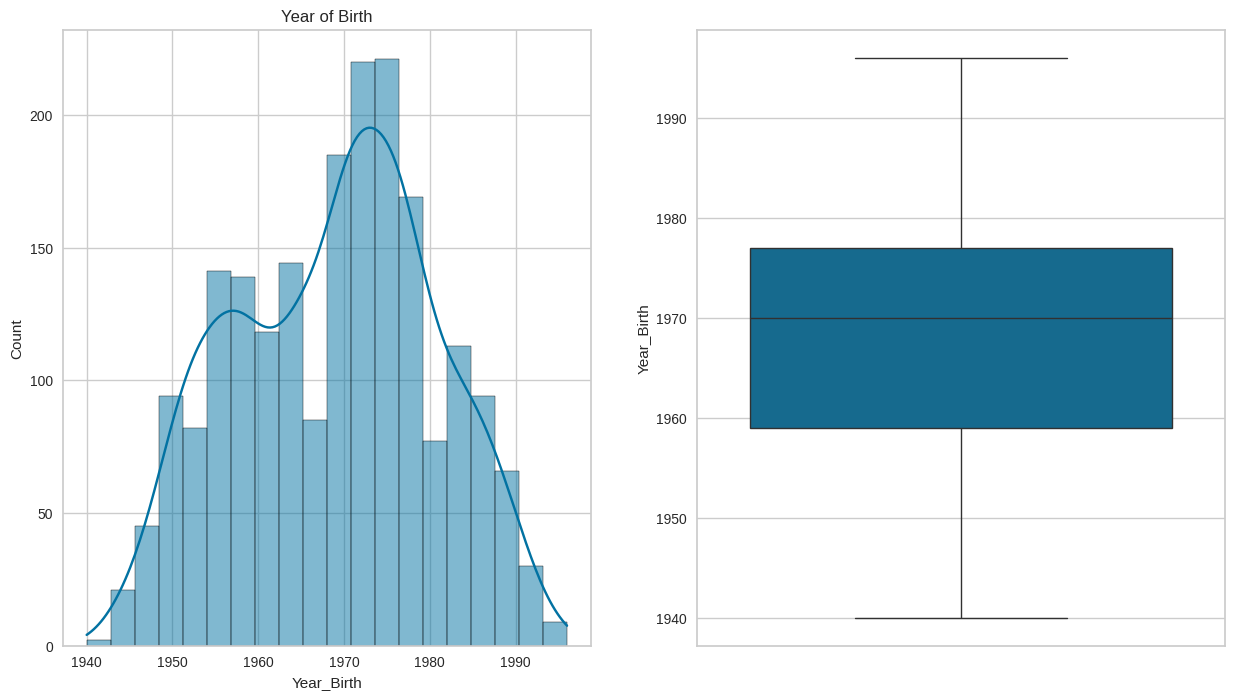

In [ ]:
#histogram and box plot for Year_Birth
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Year of Birth')
sns.histplot(data['Year_Birth'], kde=True); #added KDE to better visualize the distribution
plt.subplot(1,2,2)
sns.boxplot(data['Year_Birth']);

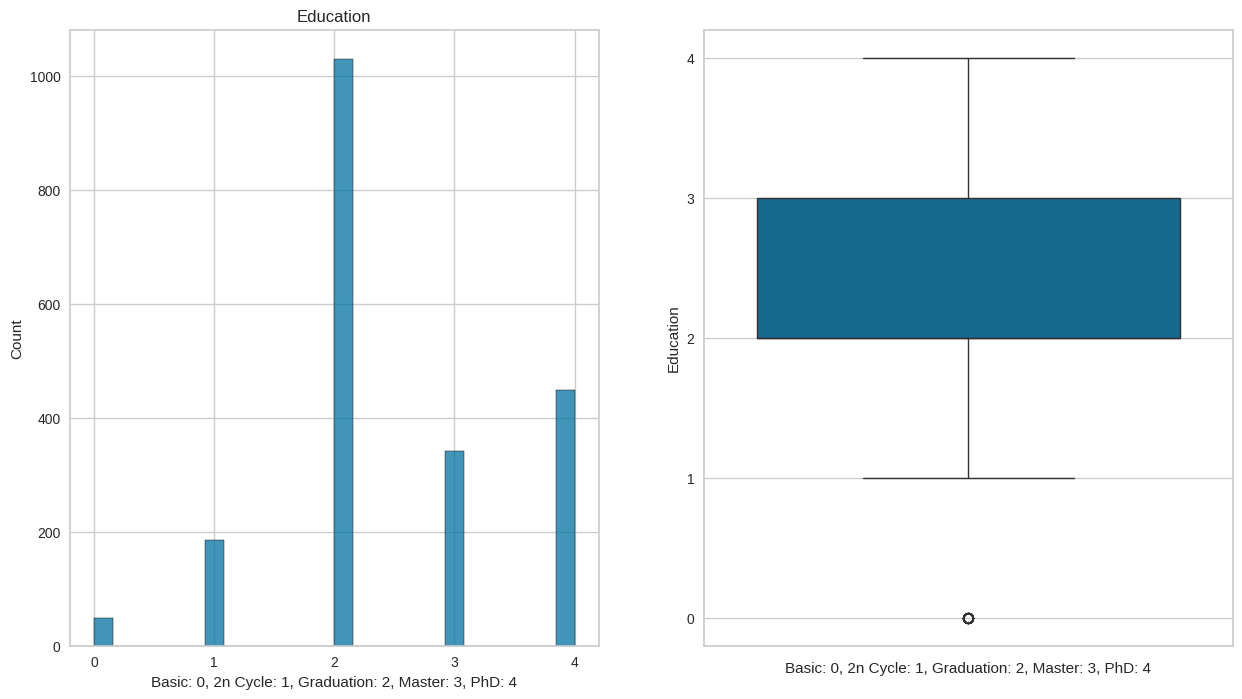

In [ ]:
#histplot and boxplot for Education
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel('Basic: 0, 2n Cycle: 1, Graduation: 2, Master: 3, PhD: 4')
plt.xticks([0,1,2,3,4])
plt.title('Education')
sns.histplot(data['Education']);
plt.subplot(1,2,2)
sns.boxplot(data['Education']);
plt.xlabel('Basic: 0, 2n Cycle: 1, Graduation: 2, Master: 3, PhD: 4')
plt.yticks([0,1,2,3,4]);

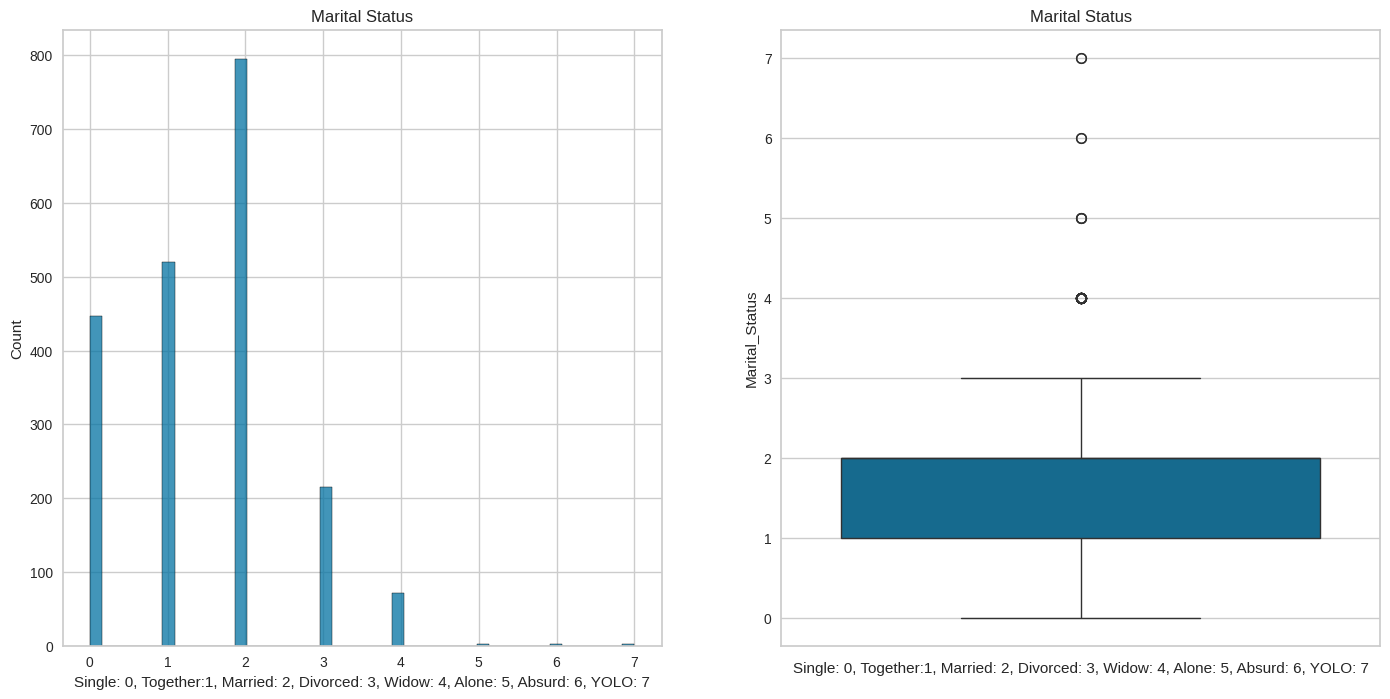

In [ ]:
#histplot and boxplot for Marital Status
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title('Marital Status')
plt.xlabel('Single: 0, Together:1, Married: 2, Divorced: 3, Widow: 4, Alone: 5, Absurd: 6, YOLO: 7')
plt.xticks([0,1,2,3,4,5,6,7])
sns.histplot(data['Marital_Status']);
plt.subplot(1,2,2)
sns.boxplot(data['Marital_Status']);
plt.title('Marital Status')
plt.xlabel('Single: 0, Together:1, Married: 2, Divorced: 3, Widow: 4, Alone: 5, Absurd: 6, YOLO: 7')
plt.yticks([0,1,2,3,4,5,6,7]);

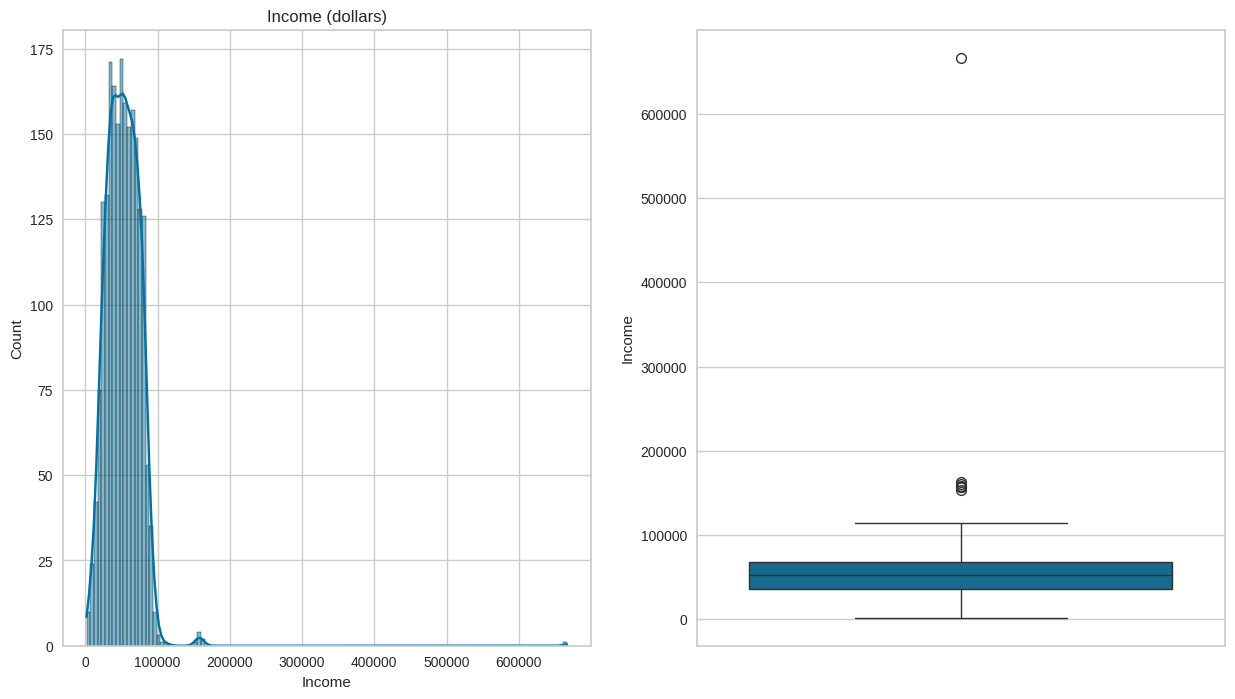

In [ ]:
#Histplot and boxplot for Income
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Income (dollars)')
sns.histplot(data['Income'],kde=True); #added KDE to better visualize the distribution
plt.subplot(1,2,2)
sns.boxplot(data['Income']);

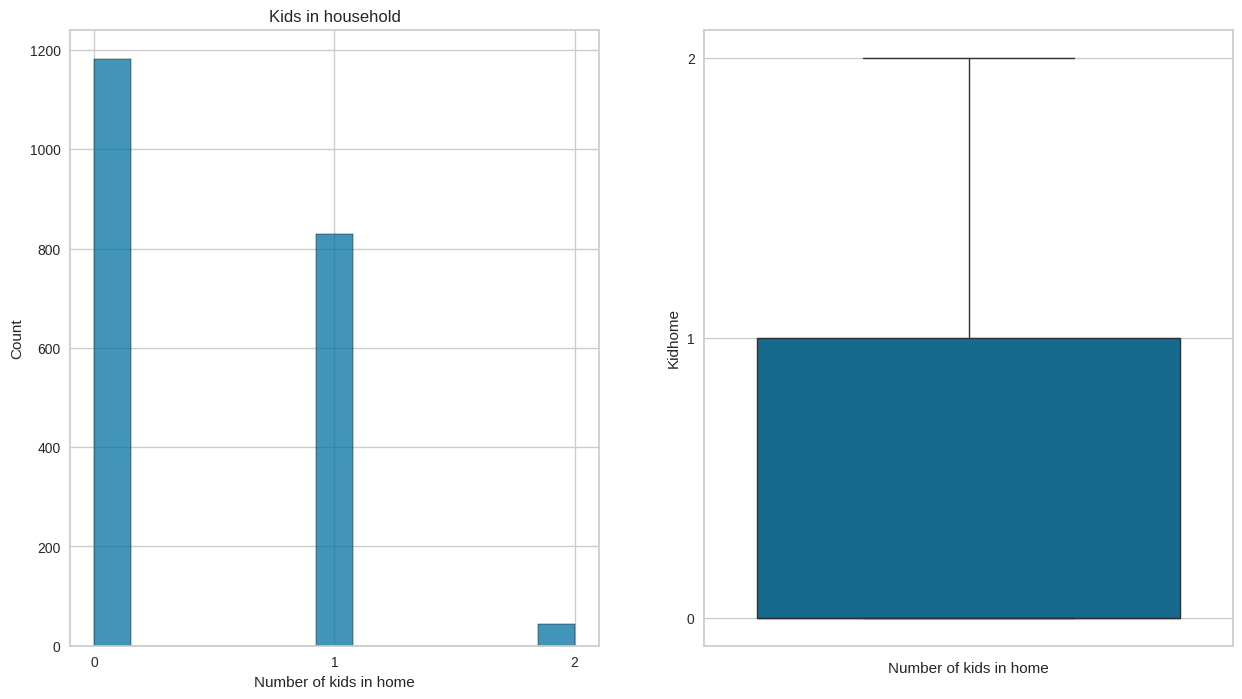

In [ ]:
#Histplot and boxplot for Kidhome. Took out continuous variables on the x/y axes since you can't have 1.5 kids
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(data['Kidhome']);
plt.title('Kids in household')
plt.xlabel('Number of kids in home')
plt.xticks([0,1,2])
plt.subplot(1,2,2)
plt.xlabel('Number of kids in home')
plt.yticks([0,1,2])
sns.boxplot(data['Kidhome']);

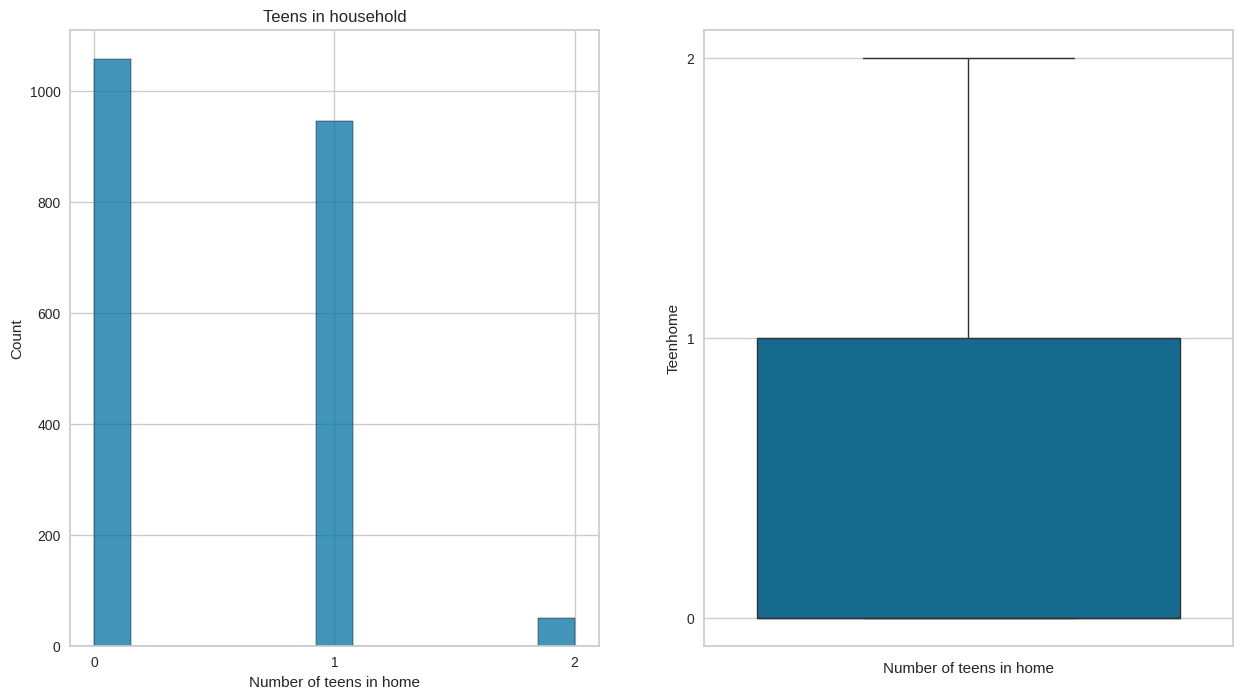

In [ ]:
#Histplot and boxplot for Teenhome. Took out continuous variables on the x/y axes since you can't have 1.5 teens
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Teens in household')
plt.xlabel('Number of teens in home')
plt.xticks([0,1,2])
sns.histplot(data['Teenhome']);
plt.subplot(1,2,2)
plt.xlabel('Number of teens in home')
plt.yticks([0,1,2])
sns.boxplot(data['Teenhome']);

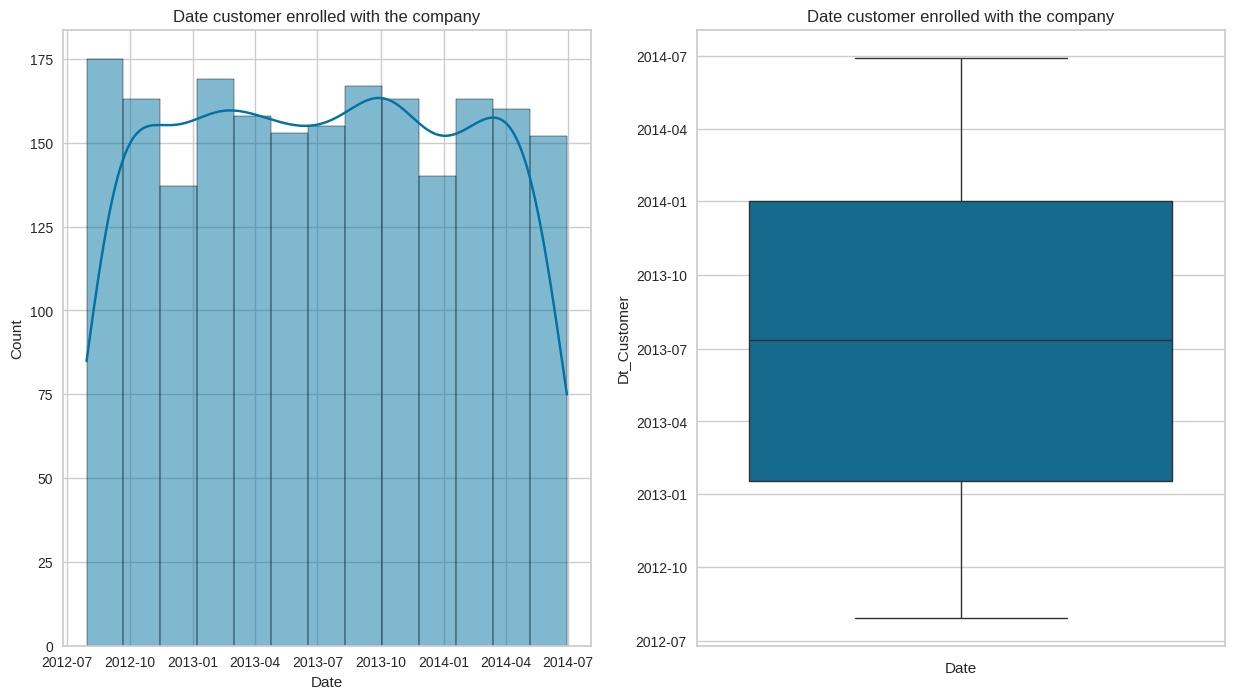

In [ ]:
#Histplot and boxplot for Dt_Customer
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(data['Dt_Customer'], kde=True); #added KDE to better visualize the distribution
plt.title('Date customer enrolled with the company')
plt.xlabel('Date')
plt.subplot(1,2,2)
plt.title('Date customer enrolled with the company')
plt.xlabel('Date')
sns.boxplot(data['Dt_Customer']);

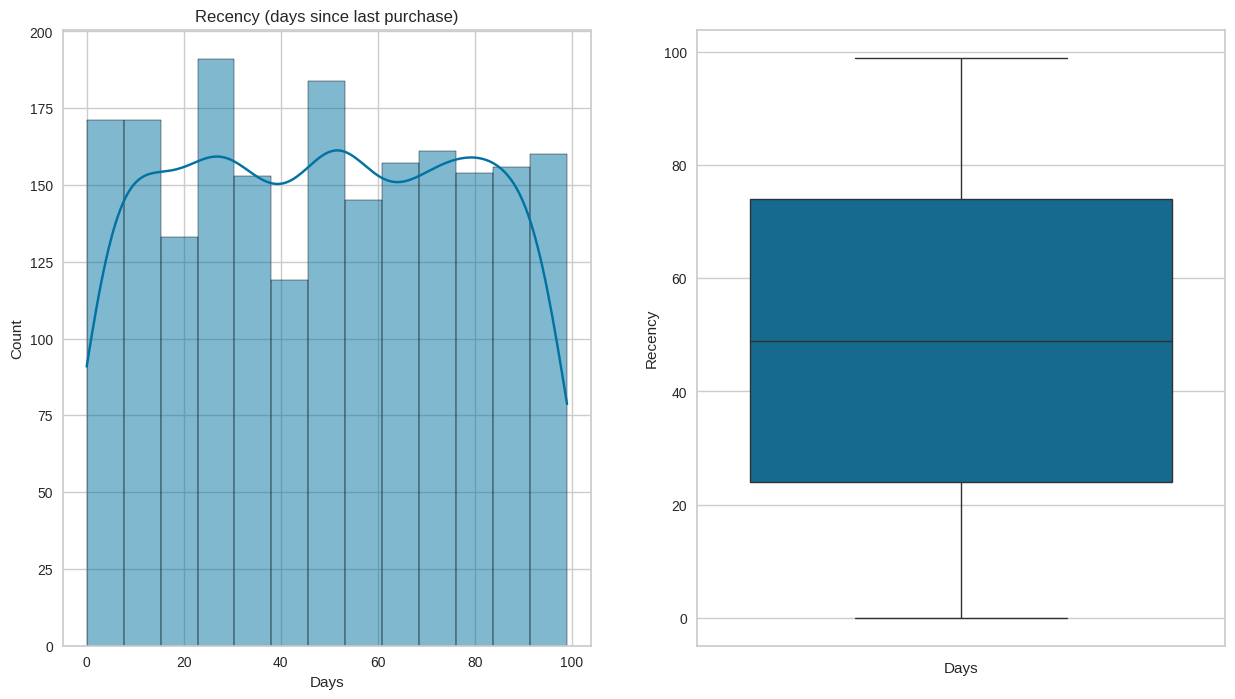

In [ ]:
#Histplot and boxplot for Recency
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Recency (days since last purchase)')
sns.histplot(data['Recency'], kde=True); #added KDE to better visualize the distribution
plt.xlabel('Days')
plt.subplot(1,2,2)
plt.xlabel('Days')
sns.boxplot(data['Recency']);

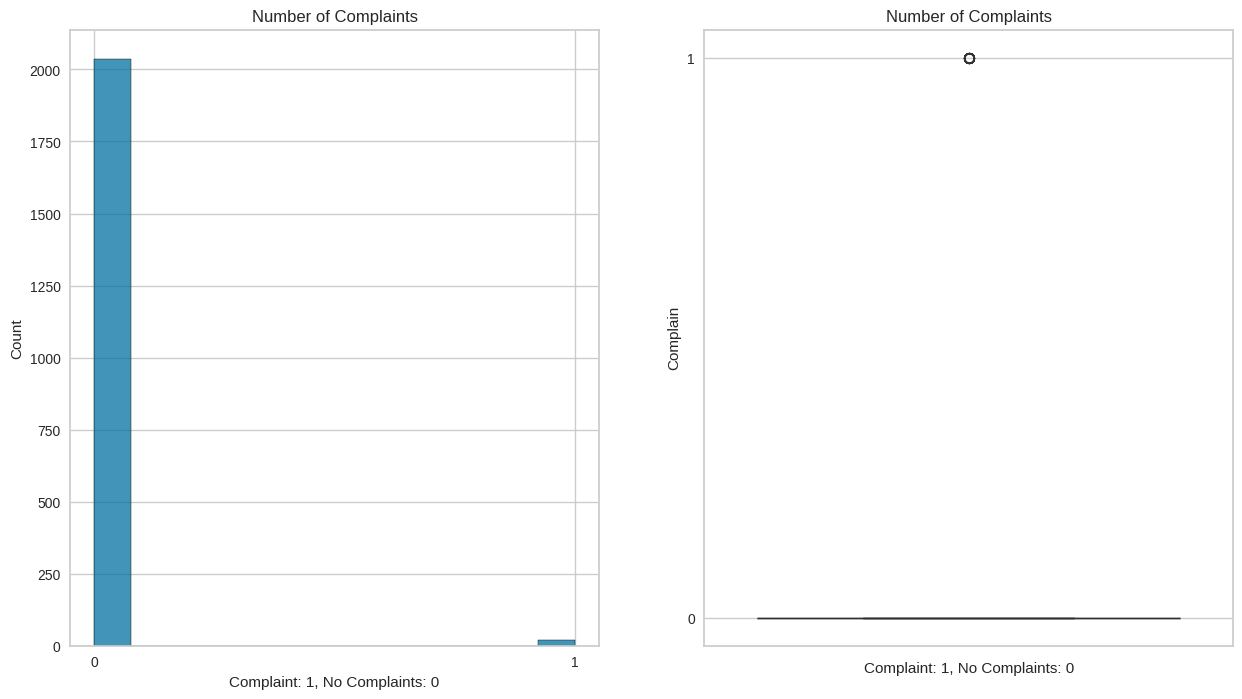

In [ ]:
#Histplot and boxplot for Complain
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of Complaints')
plt.xticks([0,1])
sns.histplot(data['Complain']);
plt.xlabel('Complaint: 1, No Complaints: 0')
plt.subplot(1,2,2)
plt.xlabel('Complaint: 1, No Complaints: 0')
plt.title('Number of Complaints')
plt.yticks([0,1])
sns.boxplot(data['Complain']);

In [ ]:
#SPENDING INFO

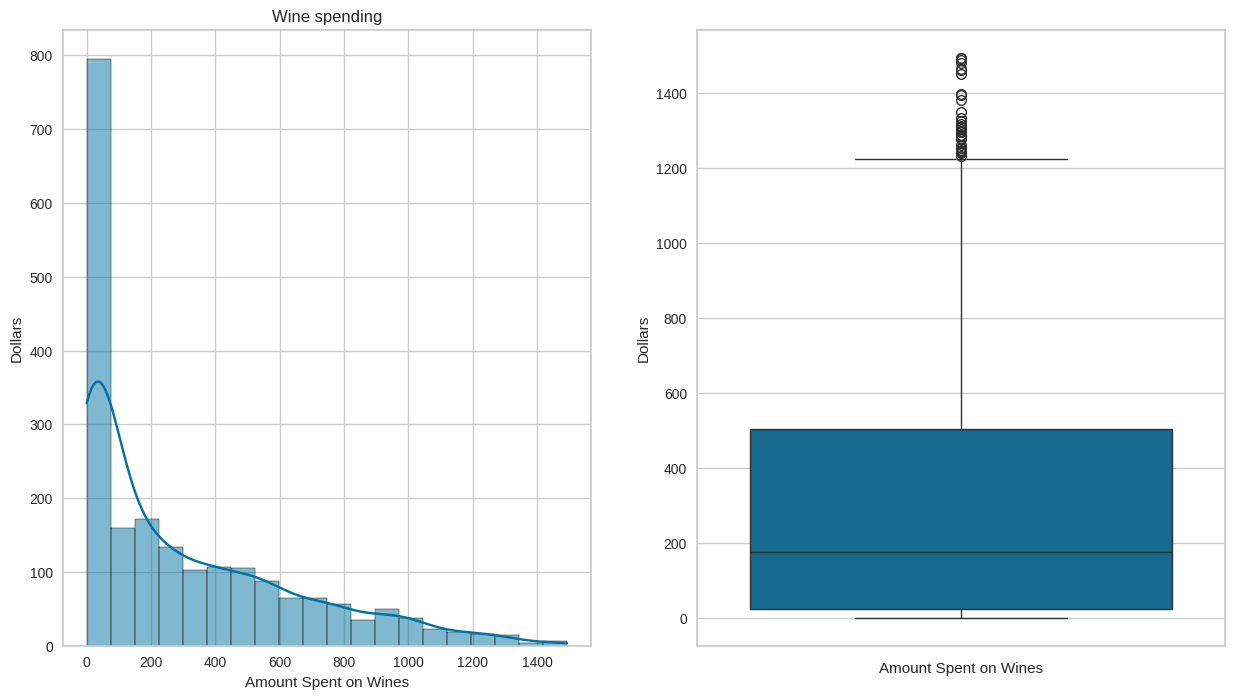

In [ ]:
#Histplot and boxplot for MntWines
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Wine spending')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Dollars')
sns.histplot(data['MntWines'], kde=True); #added KDE to better visualize the distribution
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Dollars')
sns.boxplot(data['MntWines']);

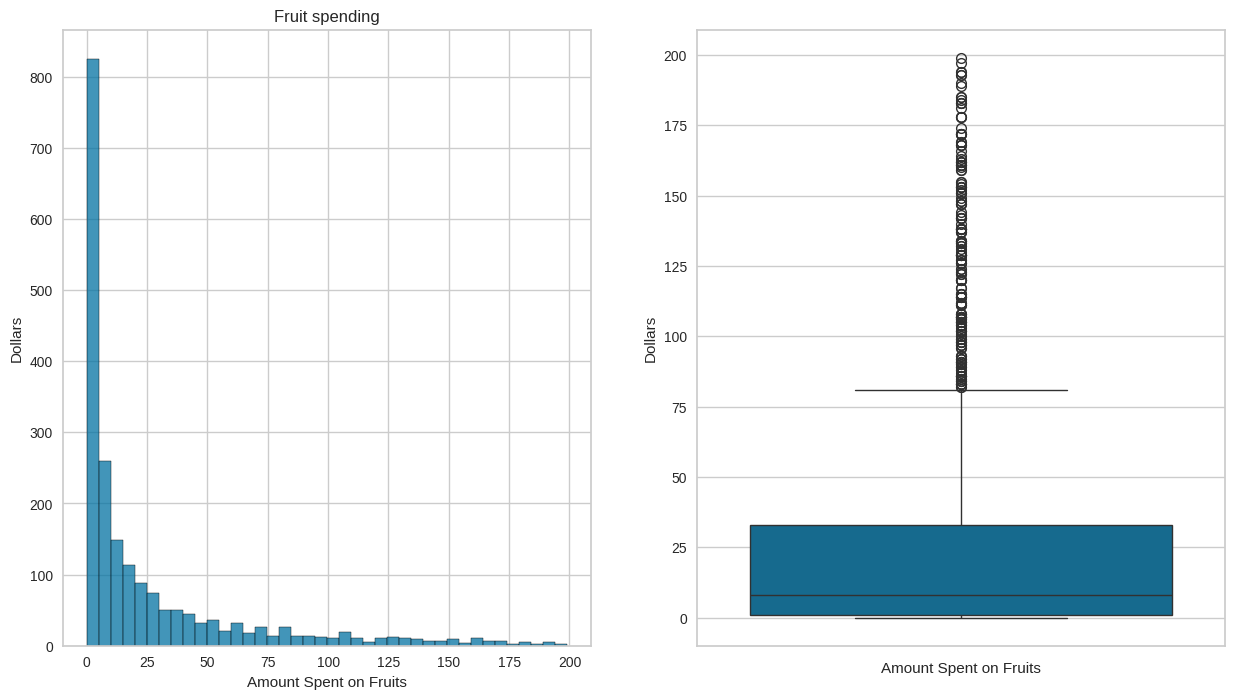

In [ ]:
#Histplot and boxplot for MntFruits
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Fruit spending')
plt.xlabel('Amount Spent on Fruits')
plt.ylabel('Dollars')
sns.histplot(data['MntFruits']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Fruits')
plt.ylabel('Dollars')
sns.boxplot(data['MntFruits']);

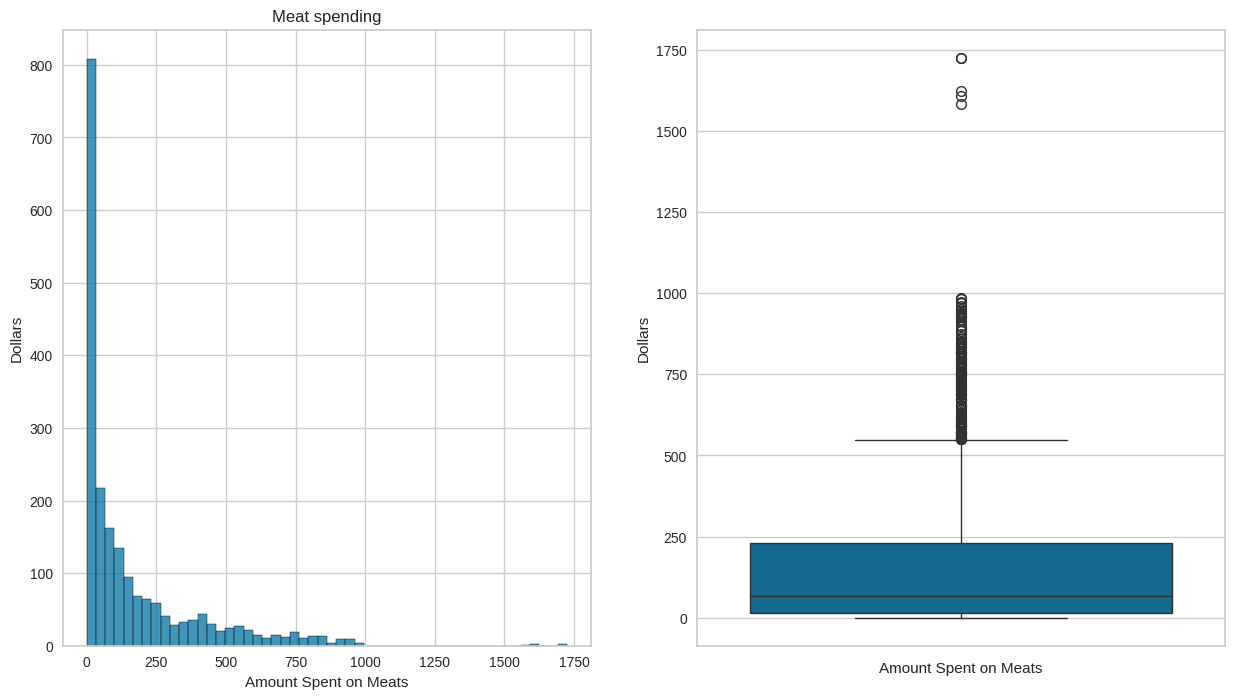

In [ ]:
#Histplot and boxplot for MntMeatProducts
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Meat spending')
plt.xlabel('Amount Spent on Meats')
plt.ylabel('Dollars')
sns.histplot(data['MntMeatProducts']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Meats')
plt.ylabel('Dollars')
sns.boxplot(data['MntMeatProducts']);

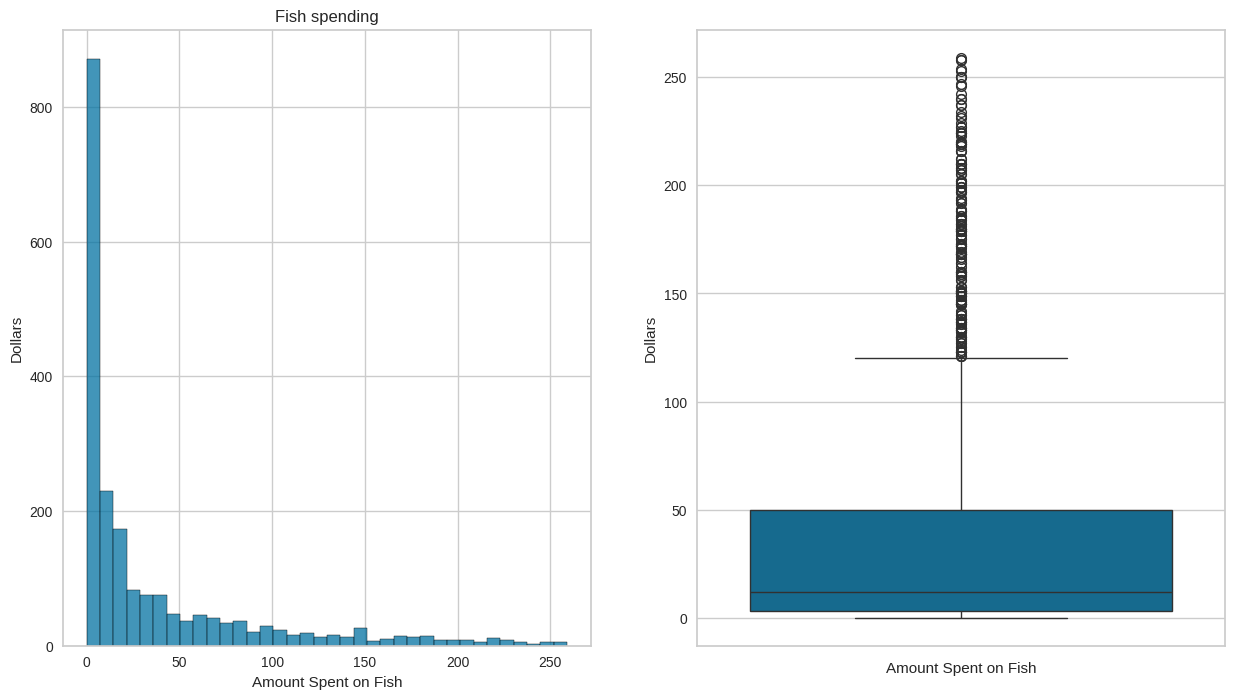

In [ ]:
#Histplot and boxplot for MntFishProducts
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Fish spending')
plt.xlabel('Amount Spent on Fish')
plt.ylabel('Dollars')
sns.histplot(data['MntFishProducts']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Fish')
plt.ylabel('Dollars')
sns.boxplot(data['MntFishProducts']);

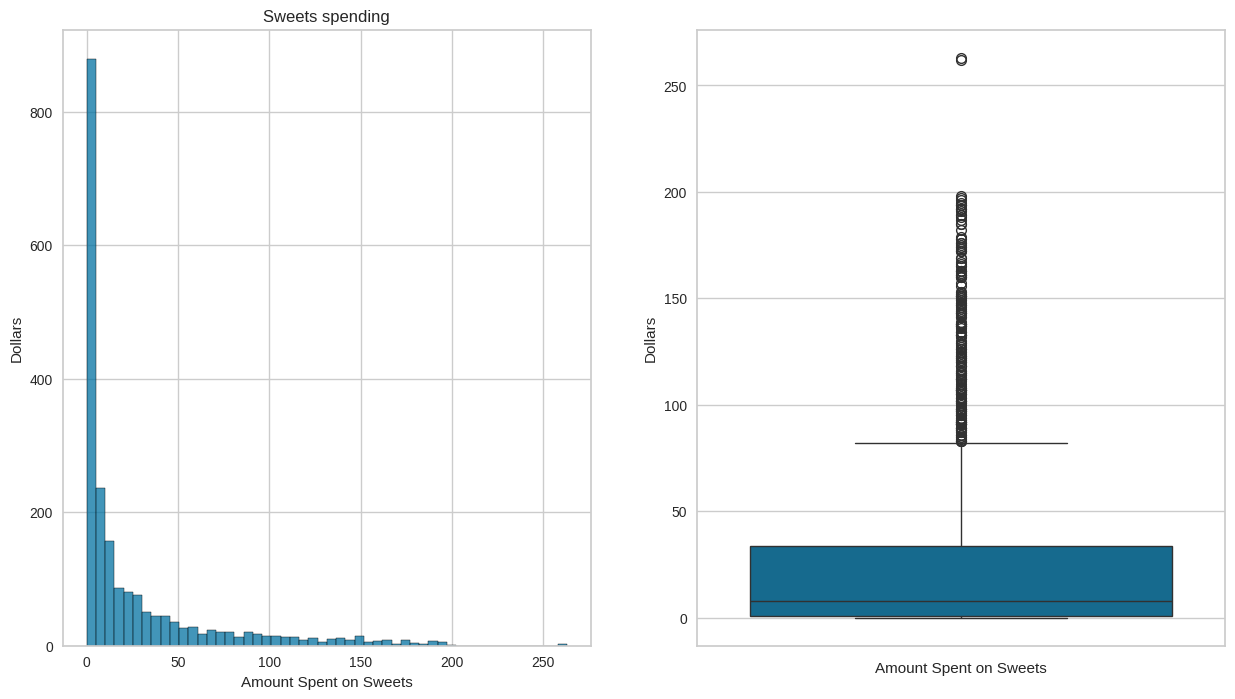

In [ ]:
#Histplot and boxplot for MntSweetProducts
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Sweets spending')
plt.xlabel('Amount Spent on Sweets')
plt.ylabel('Dollars')
sns.histplot(data['MntSweetProducts']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Sweets')
plt.ylabel('Dollars')
sns.boxplot(data['MntSweetProducts']);

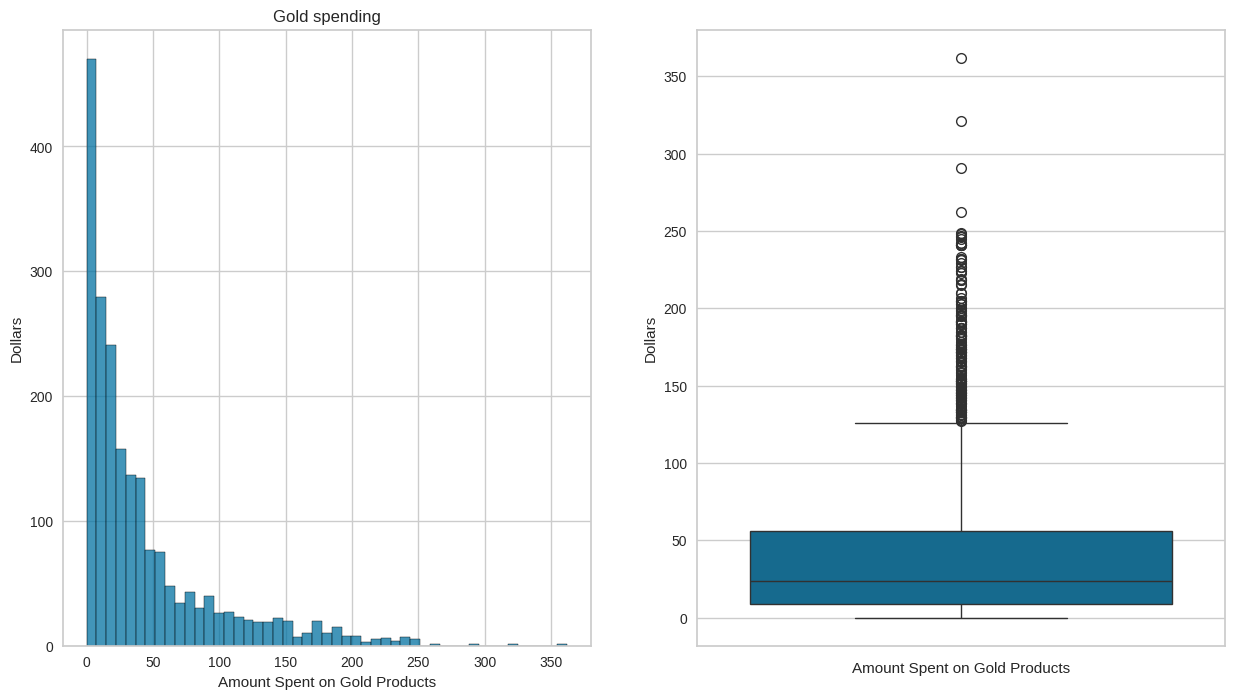

In [ ]:
#Histplot and boxplot for MntGoldProds
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Gold spending')
plt.xlabel('Amount Spent on Gold Products')
plt.ylabel('Dollars')
sns.histplot(data['MntGoldProds']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Gold Products')
plt.ylabel('Dollars')
sns.boxplot(data['MntGoldProds']);

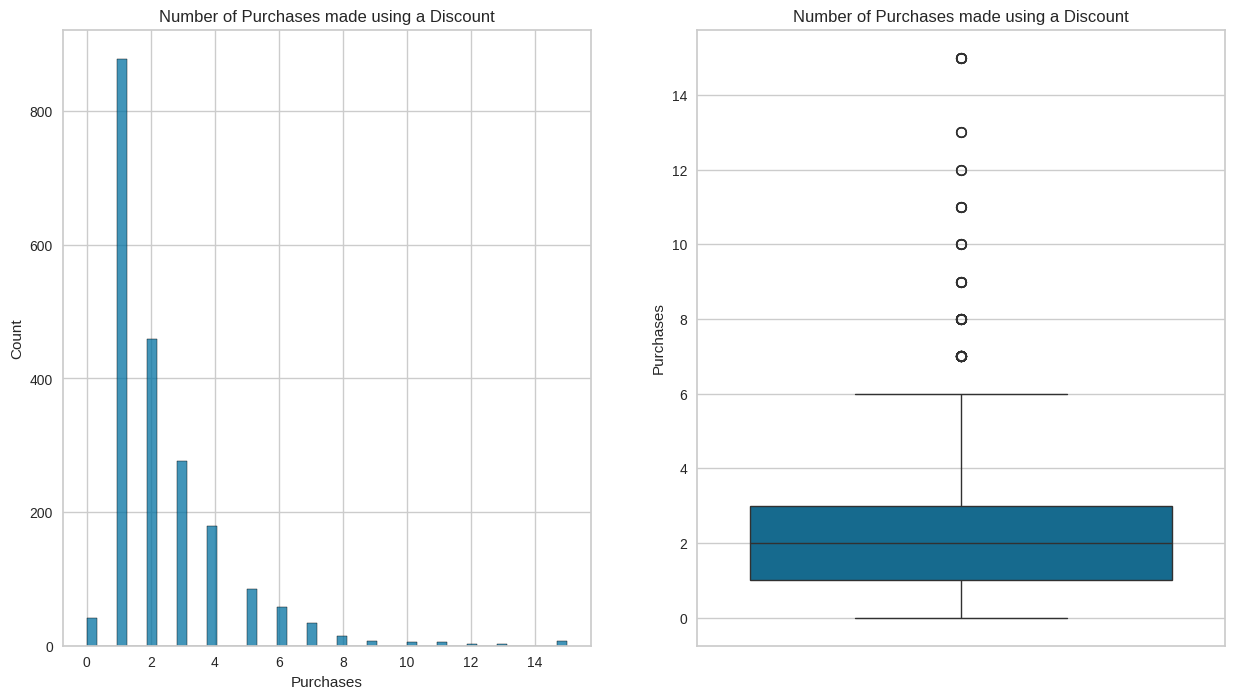

In [ ]:
#Histplot and boxplot for NumDealsPurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of Purchases made using a Discount')
sns.histplot(data['NumDealsPurchases']);
plt.xlabel('Purchases')
plt.subplot(1,2,2)
plt.title('Number of Purchases made using a Discount')
plt.ylabel('Purchases')
sns.boxplot(data['NumDealsPurchases']);

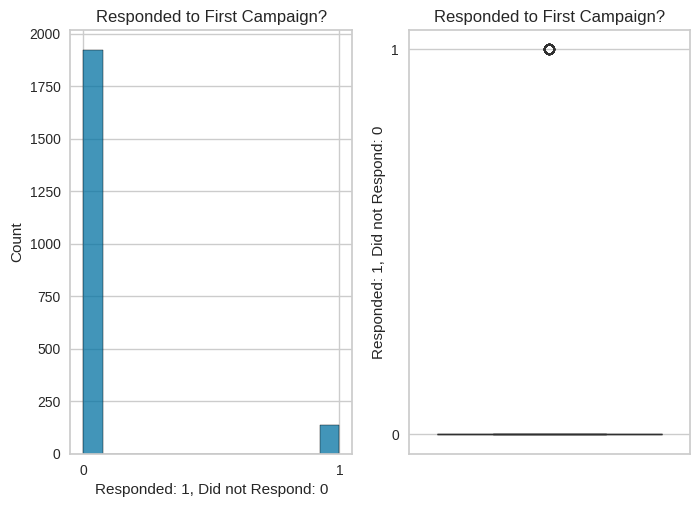

In [ ]:
#Histplot and boxplot for AcceptedCmp1
plt.subplot(1,2,1)
plt.title('Responded to First Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp1']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to First Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp1']);

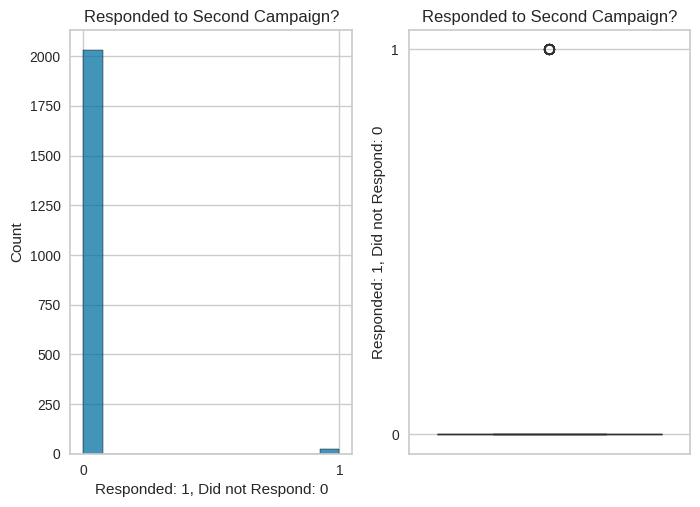

In [ ]:
#Histplot and boxplot for AcceptedCmp2
plt.subplot(1,2,1)
plt.title('Responded to Second Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp2']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Second Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp2']);

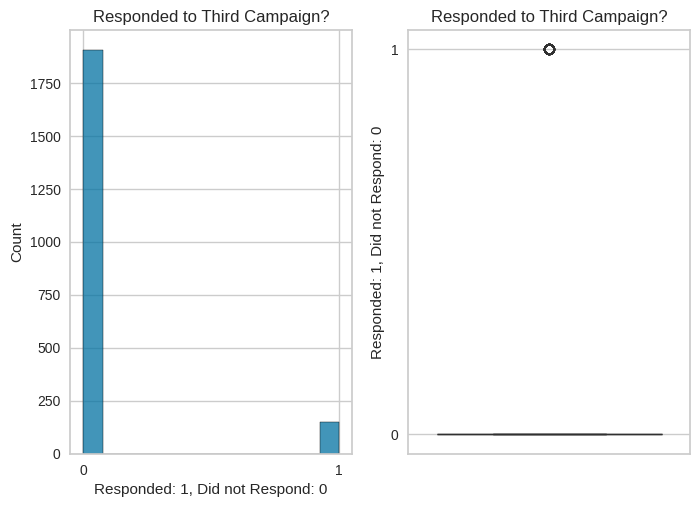

In [ ]:
#Histplot and boxplot for AcceptedCmp3
plt.subplot(1,2,1)
plt.title('Responded to Third Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp3']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Third Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp3']);

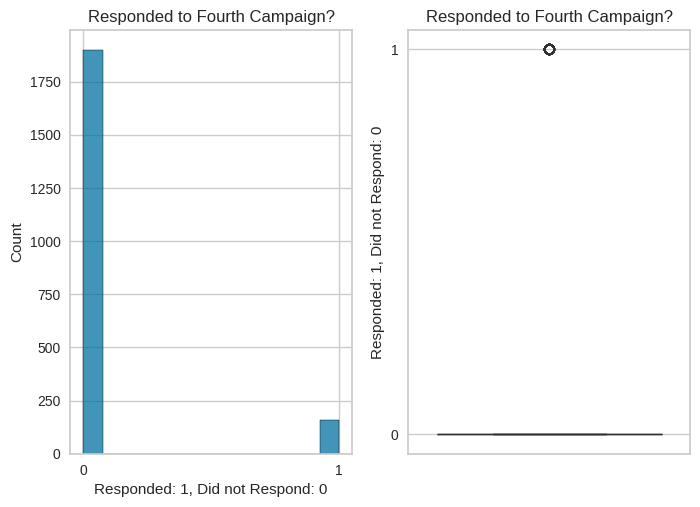

In [ ]:
#Histplot and boxplot for AcceptedCmp4
plt.subplot(1,2,1)
plt.title('Responded to Fourth Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp4']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Fourth Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp4']);

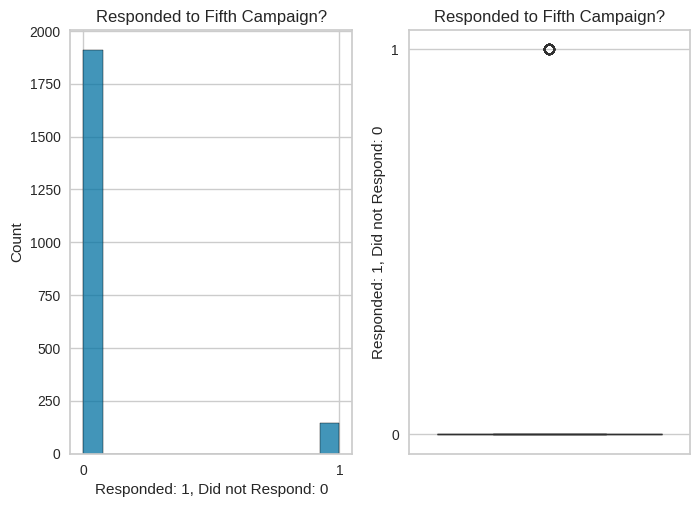

In [ ]:
#Histplot and boxplot for AcceptedCmp5
plt.subplot(1,2,1)
plt.title('Responded to Fifth Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp5']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Fifth Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp5']);

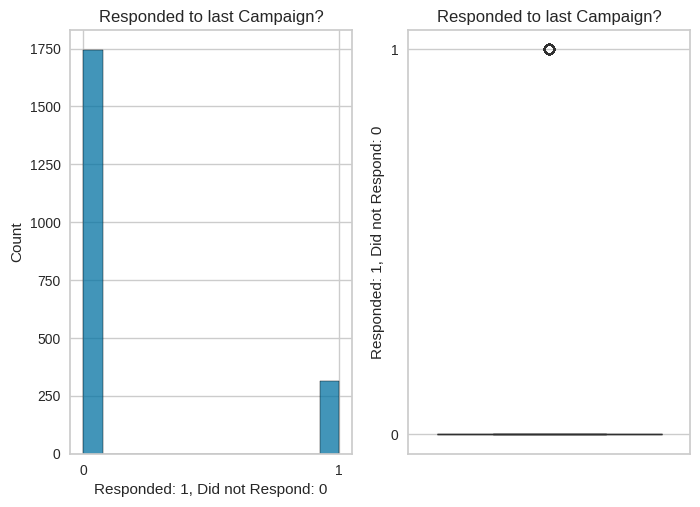

In [ ]:
#Histplot and boxplot for Response
plt.subplot(1,2,1)
plt.title('Responded to last Campaign?')
plt.xticks([0,1])
sns.histplot(data['Response']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to last Campaign?')
plt.yticks([0,1])
sns.boxplot(data['Response']);

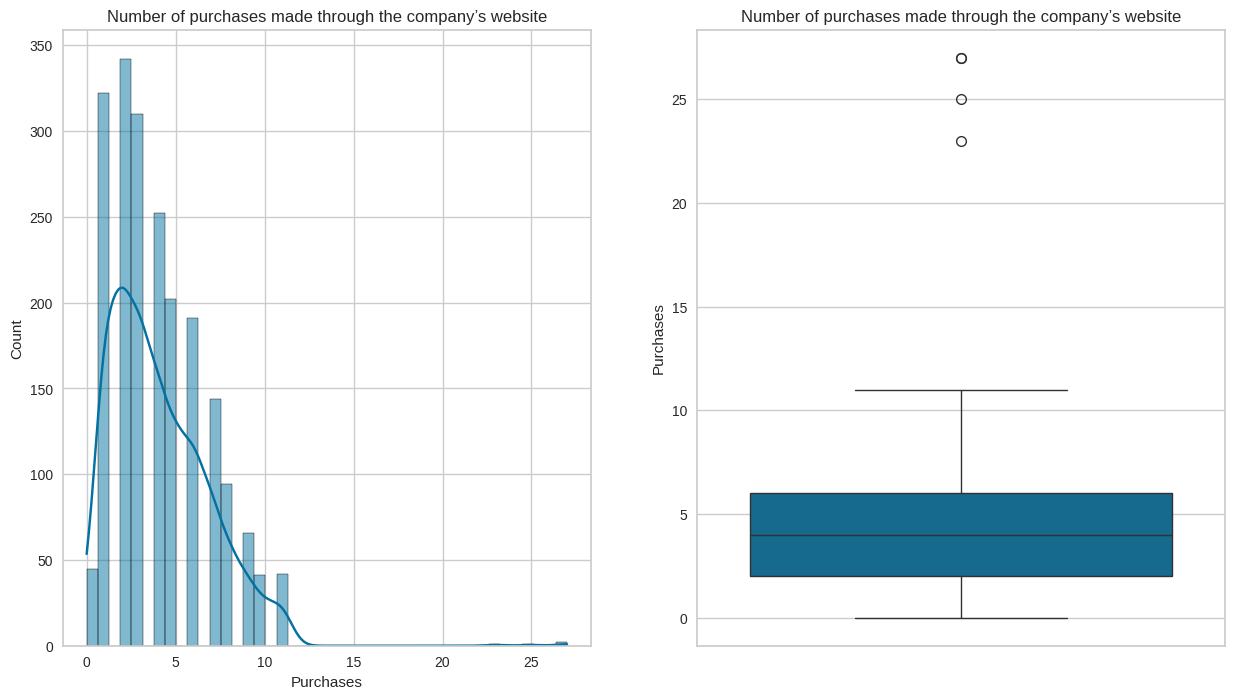

In [ ]:
#Histplot and boxplot for NumWebPurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of purchases made through the company’s website')
sns.histplot(data['NumWebPurchases'], kde=True); #added KDE to better visualize the distribution
plt.xlabel('Purchases')
plt.subplot(1,2,2)
plt.title('Number of purchases made through the company’s website')
plt.ylabel('Purchases')
sns.boxplot(data['NumWebPurchases']);

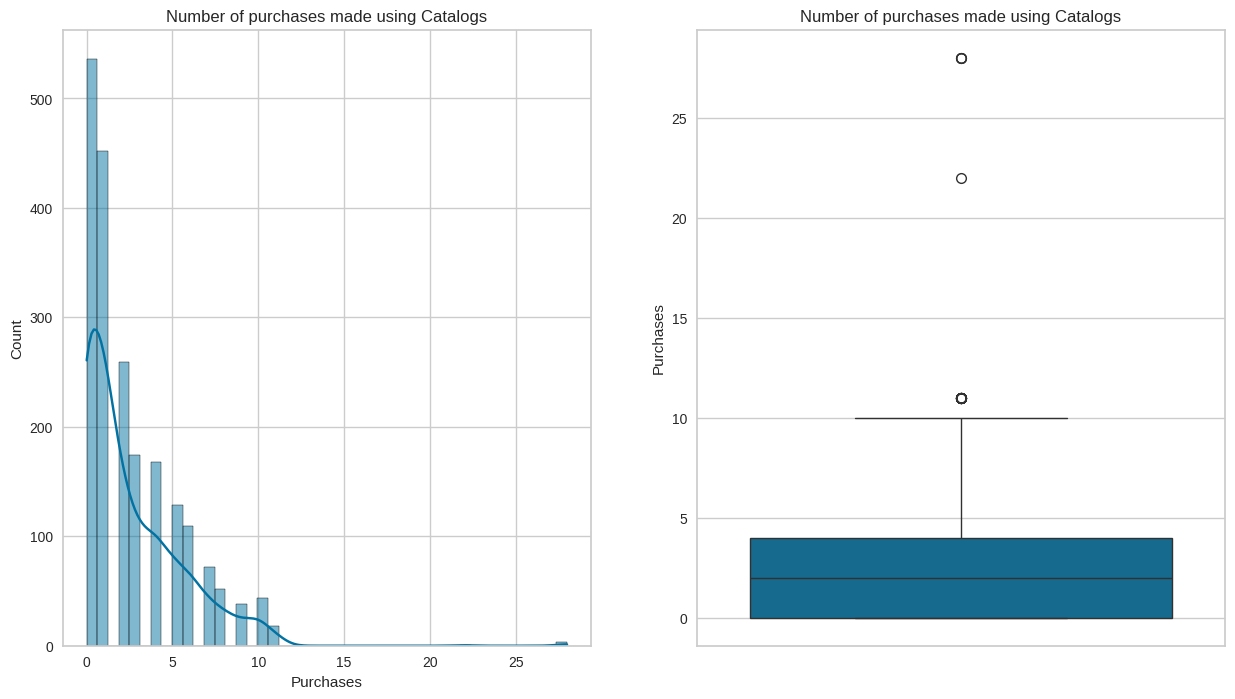

In [ ]:
#Histplot and boxplot for NumCatalogPurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of purchases made using Catalogs')
sns.histplot(data['NumCatalogPurchases'], kde=True); #added KDE to better visualize the distribution
plt.xlabel('Purchases')
plt.subplot(1,2,2)
plt.title('Number of purchases made using Catalogs')
plt.ylabel('Purchases')
sns.boxplot(data['NumCatalogPurchases']);

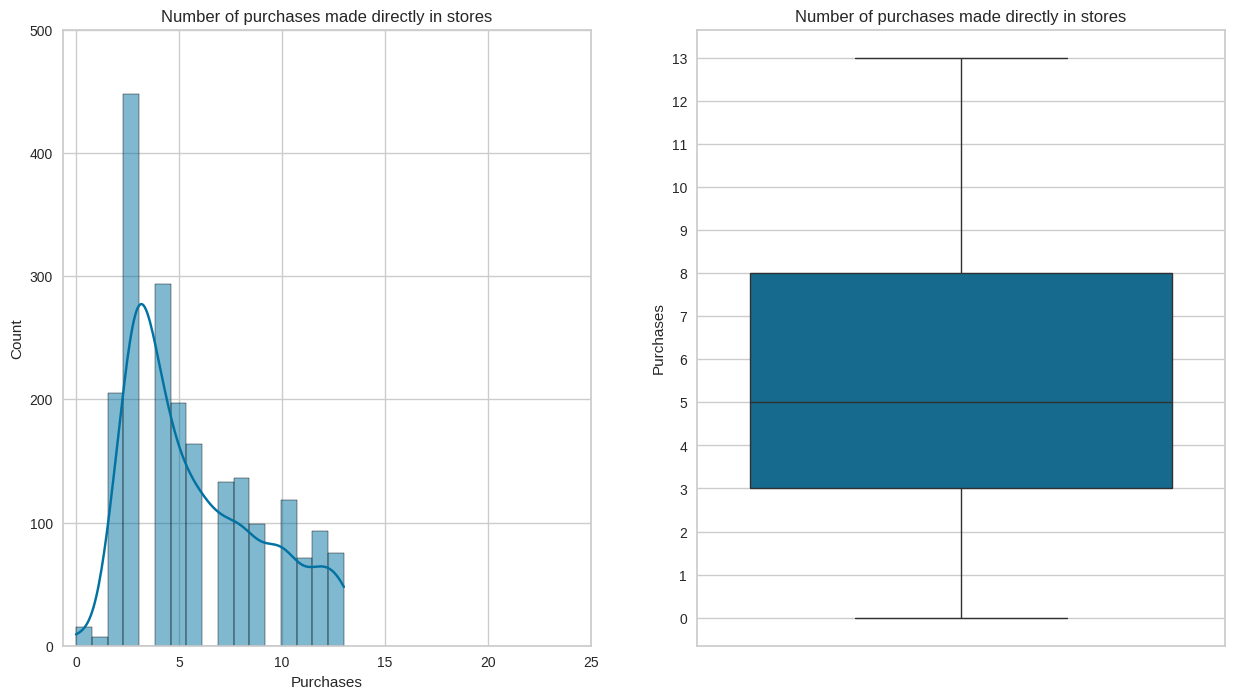

In [ ]:
#Histplot and boxplot for NumStorePurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of purchases made directly in stores')
sns.histplot(data['NumStorePurchases'], kde=True);
plt.xlabel('Purchases')
plt.xticks(range(0,26, 5)) #increased max limit of x axis to make it easier to visually compare with the purchases charts above
plt.yticks(range(0,600, 100)) #increased max limit of y axis to make it easier to visually compare with the purchases charts above
plt.subplot(1,2,2)
plt.title('Number of purchases made directly in stores')
plt.ylabel('Purchases')
plt.yticks(range(0,26))
sns.boxplot(data['NumStorePurchases']);

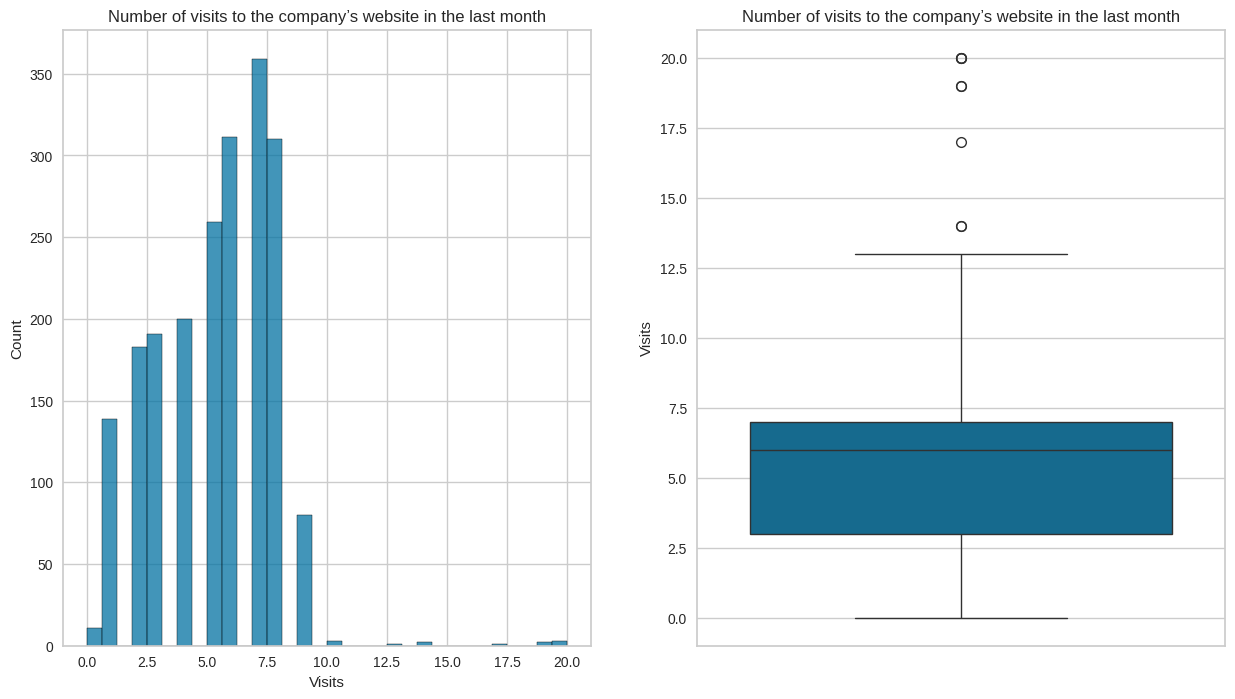

In [ ]:
#Histplot and boxplot for NumWebVisits
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of visits to the company’s website in the last month')
sns.histplot(data['NumWebVisitsMonth']);
plt.xlabel('Visits')
plt.subplot(1,2,2)
plt.title('Number of visits to the company’s website in the last month')
plt.ylabel('Visits')
sns.boxplot(data['NumWebVisitsMonth']);

##### **Observations:**

**Wines**

Positive Skew with highest maximum amount spent overall.

**Fruits**

Positive Skew with lowest maximum amount spent overall.

**Meats**

Positive Skew with the second highest maximum amount spent.

**Fish**

Positive Skew with maximum amount spent about the same as Fruits.

**Sweets**

Positive Skew with maximum amount spent about the same as Fruits and Fish.

**Gold**

Positive Skew with maximum amount spent about $100 higher than Fruits, Fish, and Sweets.

^Lots of outliers for all products above.

**Discounts**

Almost all customers take advantage using a Discount at least one (1) time.

The majority of customers do not respond to Campaigns. You get < 10% of them responded to, at best.

Customers are more likely to make a purchase online via, in descending order:
1. The company's website
2. Directly in-store
3. Via catalog

With a sharp drop in purchases made via in-store and via catalog

**Website visits the past month**

Positive Skew with half of all customers making between 3-7 visits the past month.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

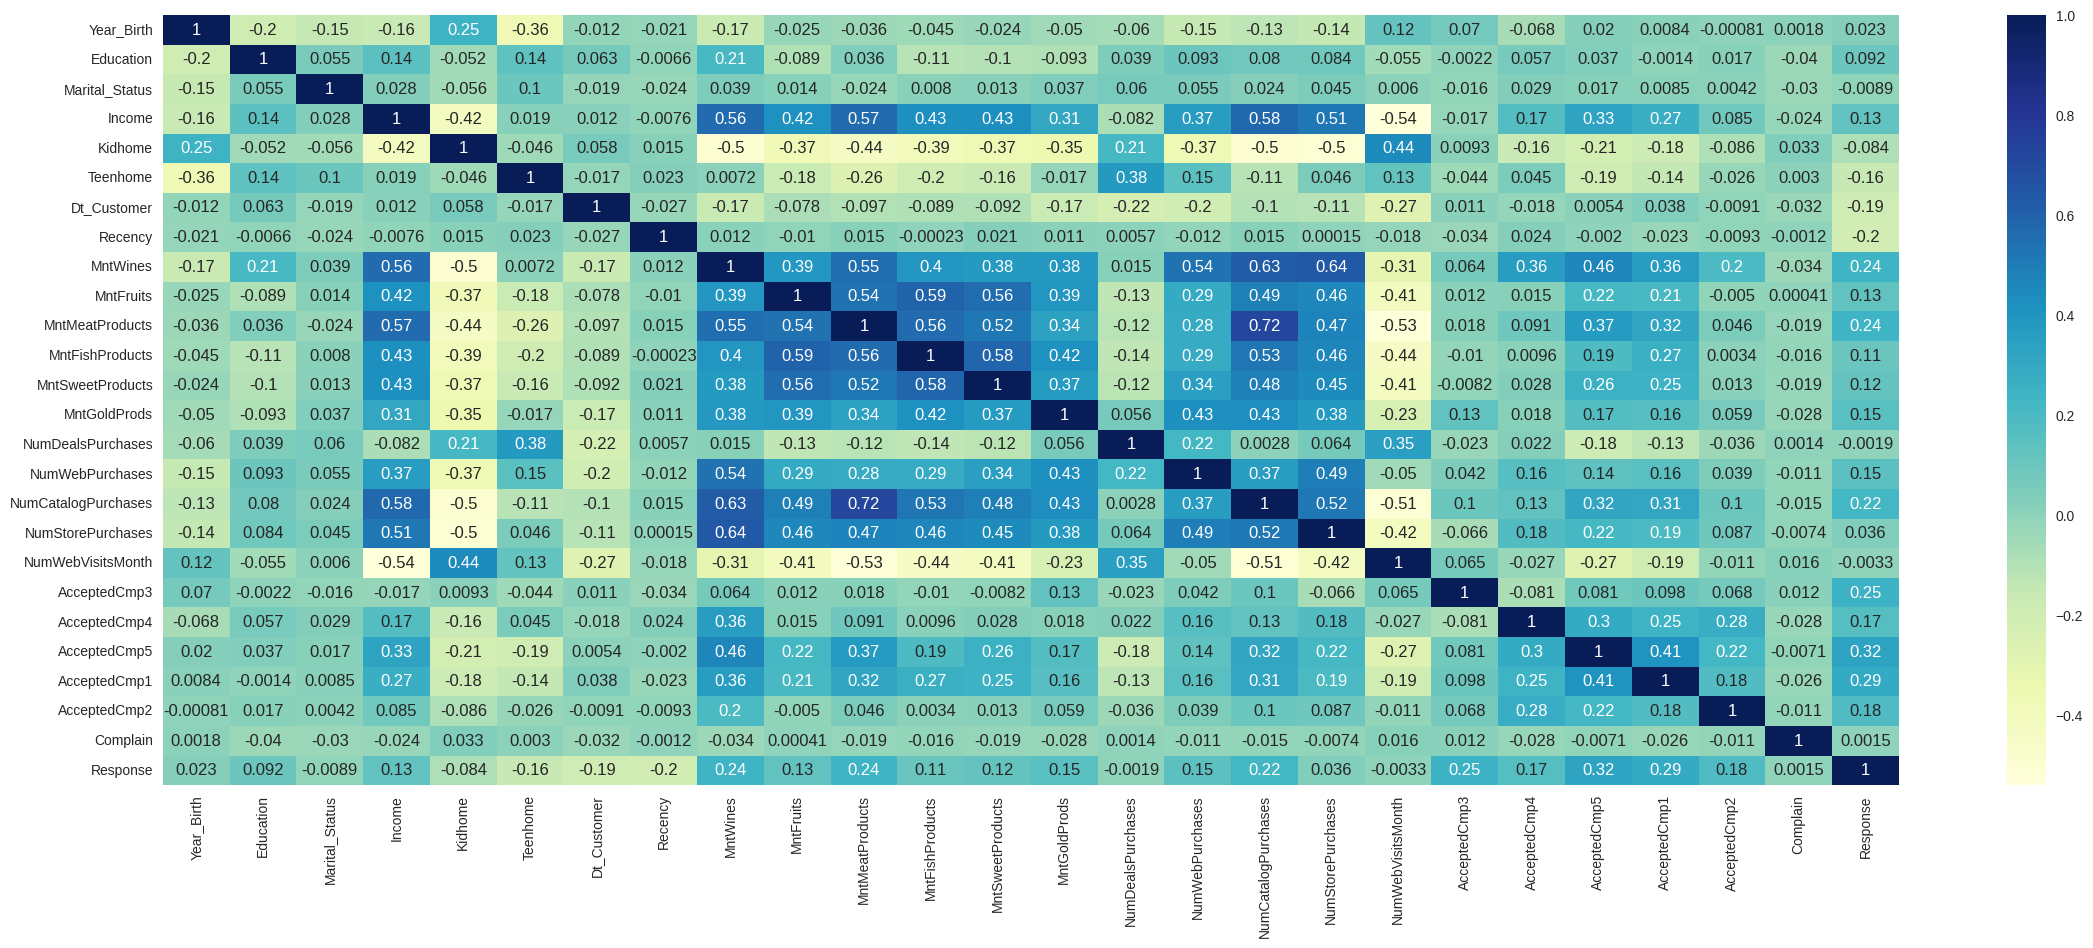

In [ ]:
#creating heat map for multivariate analysis
data_corr=data.corr()
plt.figure(figsize=(28,10))
sns.heatmap(data_corr, annot=True, cmap="YlGnBu");

##### **Observations:**

I went with a Heatmap for multivariate analysis. I considered a pairplot analysis, but that probably would have crashed Google Collab and/or my computer!

**Customers have the highest correlation to purchase:**
1. Meats via catalog
2. Wines in-store
3. Wines via catalog
4. Wines online
5. Meats in-store

**Customers have higher correlation to purchase foods in some combination. In descending order:**
1. Fruits and Fish
2. Fish and Sweets
3. Fruits and Sweets
4. Meats and Fish
5. Wines and Meats
6. Fruits and Meats

**Highest correlation for website purchases:**
1. Wines
2. Gold
3. Sweets

**Highest correlation for in-store purchases:**
1. Wines
2. Meats
3. Fish or Fruits (tie)

**Highest correlation for catalog purchases:**
1. Meats
2. Wines
3. Fruits

**PURCHASE AND CAMPAIGN INTERACTION**

Customers have a higher correlation to purchases Wines with more recent campaigns.

Correlation dipped by the third campaign, but increased on the 4th and 5th campaign. The biggest drop in correlation came in the final campaign.

This pattern was pretty consistent for all other products, as well.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [ ]:
#Current date format not working for Standardizing. Changing date/time format to float
data['Dt_Customer']=data['Dt_Customer'].dt.strftime('%Y%m%d').astype(float)

In [ ]:
#standardizing data once again
scaler = StandardScaler()
data_scaled =pd.DataFrame(scaler.fit_transform(data), columns= data.columns)
data_scaled.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.019554,-0.462454,-1.386954,0.228270,-0.829289,-0.932418,-1.515549,0.312350,0.983925,1.557523,1.657939,2.464027,1.457768,0.849866,0.339067,1.393559,2.501673,-0.548181,0.687716,-0.281614,-0.288599,-0.277568,-0.265165,-0.1132,-0.096602,2.359130
1,-1.276768,-0.462454,-1.386954,-0.236470,1.031179,0.897686,1.405047,-0.377657,-0.870893,-0.635107,-0.708477,-0.646345,-0.627615,-0.727347,-0.175543,-1.108481,-0.566323,-1.165786,-0.132276,-0.281614,-0.288599,-0.277568,-0.265165,-0.1132,-0.096602,-0.423885
2,-0.333649,-0.462454,-0.461568,0.759248,-0.829289,-0.932418,-0.022890,-0.791661,0.362680,0.574620,-0.178224,1.347953,-0.148217,-0.034912,-0.690154,1.393559,-0.225434,1.304635,-0.542272,-0.281614,-0.288599,-0.277568,-0.265165,-0.1132,-0.096602,-0.423885
3,1.295376,-0.462454,-0.461568,-1.012663,1.031179,-0.932418,1.390296,-0.791661,-0.870893,-0.559499,-0.647125,-0.499974,-0.579676,-0.746581,-0.175543,-0.751047,-0.907211,-0.548181,0.277720,-0.281614,-0.288599,-0.277568,-0.265165,-0.1132,-0.096602,-0.423885
4,1.038161,1.527792,0.463819,0.234377,1.031179,-0.932418,1.376599,1.554362,-0.389354,0.423404,-0.217665,0.158693,-0.004397,-0.554238,1.368288,0.321256,0.115454,0.069424,-0.132276,-0.281614,-0.288599,-0.277568,-0.265165,-0.1132,-0.096602,-0.423885


In [ ]:
#KMeans algorithm for elbow method
WCSS={}
for k in range(2,10):
  kmeans = KMeans (n_clusters=k, max_iter=1000).fit(data_scaled)
  WCSS[k]=kmeans.inertia_

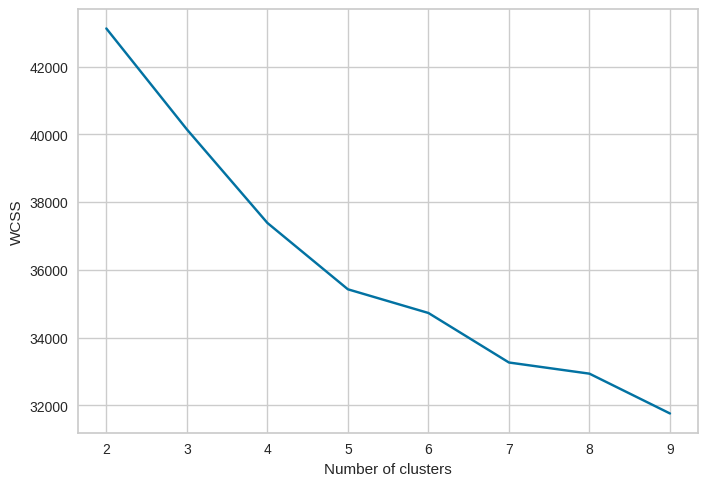

In [ ]:
#Plotting the Elbow point
plt.figure()
plt.plot(list(WCSS.keys()), list(WCSS.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

##### **Observations:**

The elbow point looks like it is at 3 clusters. Let's see what the Silhouette score says....

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

Silhouette scores shows 2 is the optimal value for k, which is indeed different from the value for k via the Elbow plot.

In [ ]:
#calculating silhouette score
silhouette_scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal k based on silhouette score:", optimal_k)

Optimal k based on silhouette score: 2


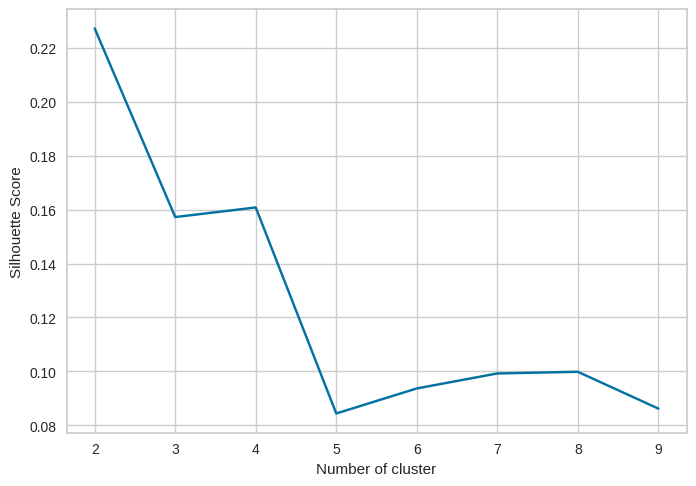

In [ ]:
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

##### **Observations:**

Elbow plot and Silhouette Score are disagreeing with each other. Going to visualize both and see what happens.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

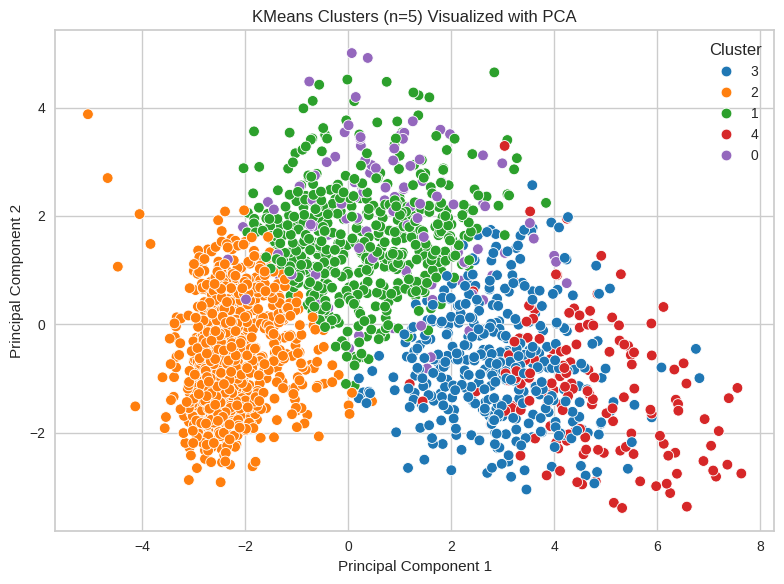

In [ ]:
#plotting 5 clusters
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_scaled)

plot_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
plot_df['Cluster'] = cluster_labels.astype(str)  # Strings for categorical coloring

#Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('KMeans Clusters (n=5) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [ ]:
#Got suboptimal results; way too much overlapping here. Trying 2 clusters, instead

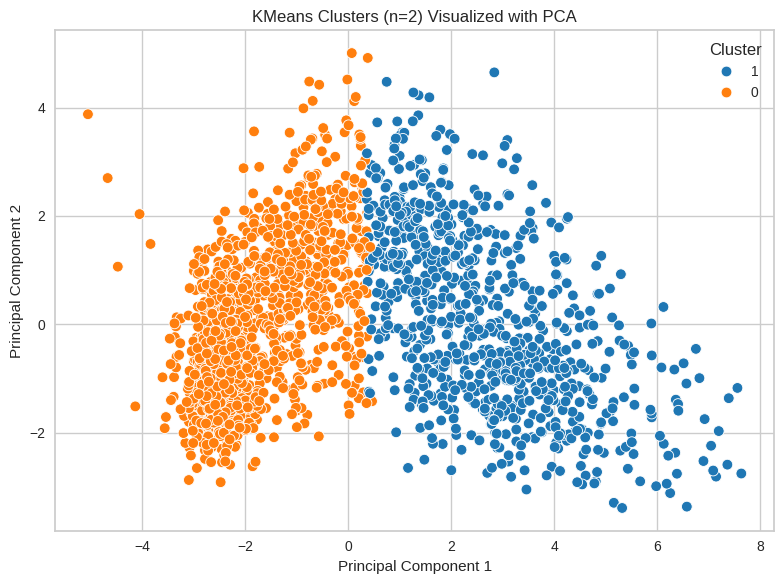

In [ ]:
#plotting 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plot_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
plot_df['Cluster'] = cluster_labels.astype(str)  # Strings for categorical coloring

#Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
plt.title('KMeans Clusters (n=2) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

##### **Observations:**

Elbow and Silhouette score helped whittle down the possible number of clusters to use.

Plotting for both 2 and 5 clusters show that 2 clusters is best (since there is minimal overlap).

The model was able to fit the data in less than two (2) seconds.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [ ]:
#Fitting the K-means algorithms on the scaled data with number of cluster equal to 2 and Storing the predictions as 'Labels' to the 'data_scaled' and 'data' dataframes
kmeans = KMeans(n_clusters=2, max_iter= 1000, random_state=1)
kmeans.fit(data_scaled)

KMeans(max_iter=1000, n_clusters=2, random_state=1)

In [ ]:
#Adding predicted labels to the original data and scaled data
data['Labels'] = kmeans.predict(data_scaled)
data_scaled['Labels'] = kmeans.predict(data_scaled)

In [ ]:
data.Labels.value_counts()

,count
Labels,
0,1229
1,826


In [ ]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
Year_Birth,1.970167e+03,1.966994e+03,1972.0,1967.0
Education,2.424736e+00,2.524213e+00,2.0,2.0
Marital_Status,1.472742e+00,1.537530e+00,2.0,2.0
Income,3.915240e+04,7.197430e+04,38620.0,71379.0
Kidhome,7.005696e-01,6.658596e-02,1.0,0.0
Teenhome,5.581774e-01,4.370460e-01,1.0,0.0
Dt_Customer,2.013147e+07,2.013023e+07,20130805.0,20130526.0
Recency,4.874939e+01,4.923971e+01,49.0,50.0
MntWines,1.025289e+02,6.037349e+02,35.0,560.5
MntFruits,6.588283e+00,5.538015e+01,3.0,40.0


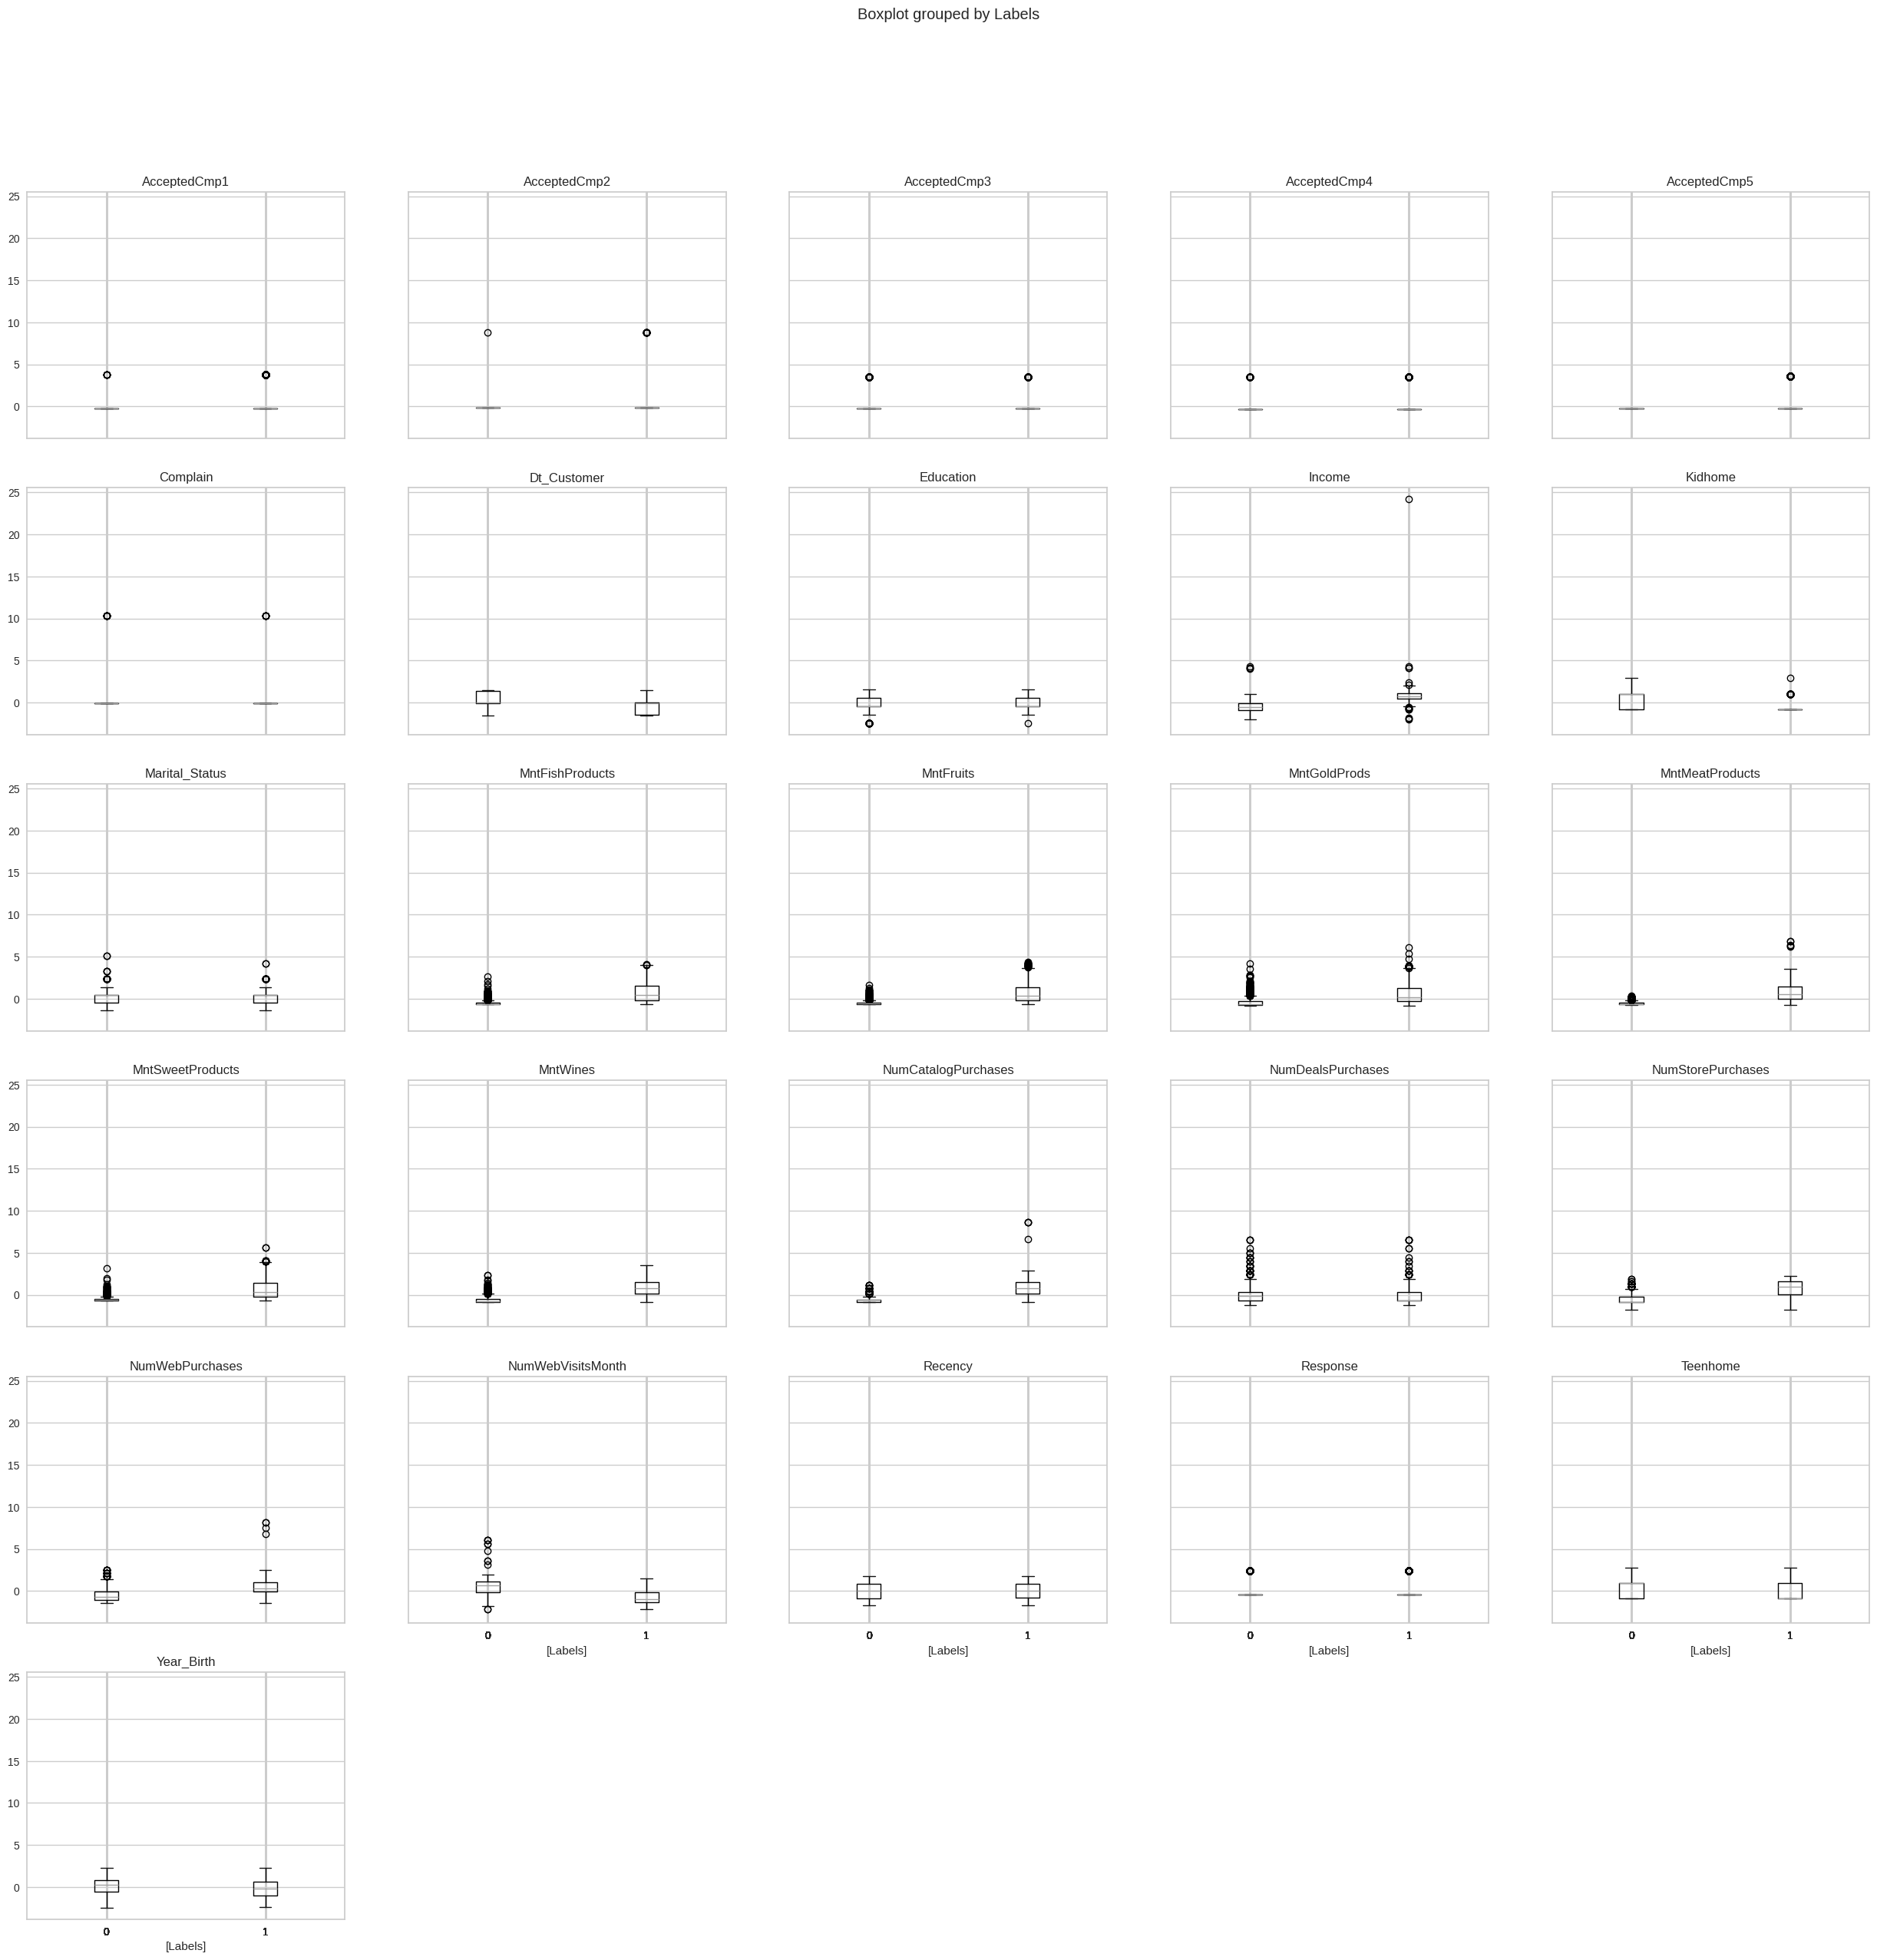

In [ ]:
#Visualizing different features w.r.t K-means labels
data_scaled.boxplot(by = 'Labels', figsize=(30,30))
plt.show()

##### **Observations:**

**Cluster 0:**
1. Less average income
2. Enrolled more recently
3. More likely to be married
4. Less purchases overall, no matter the product
5. Visits the website more ("window shopping")
6. Are younger

**Cluster 1:**
1. Higher average income, thus more purchases overall
2. Has been enrolled longer
3. Makes more purchases via the Store, Catalog, then the Web, in that order
4. Are older
5. More likely to be divorced or widowed

Both Clusters/groups will make purchases using a discount.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

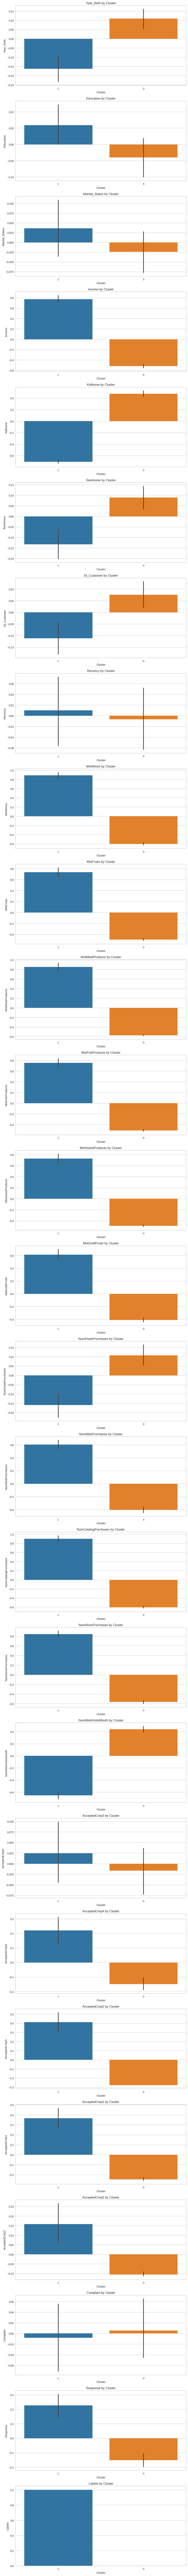

In [ ]:
#creating boxplots for the clusters created
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled['Cluster'] = cluster_labels.astype(str)
num_features = len(data.columns)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))


for i, col in enumerate(data.columns):
    sns.barplot(data=data_scaled, x='Cluster', y=col, ax=axes[i], palette='tab10')
    axes[i].set_title(f'{col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

##### **Observations:**

**Cluster 0**
1. Younger
2. Lower education
3. More likely to be Single
4. Less average income
5. More likely to have kids and teens
6. Enrolled more recently
7. Lower amount of purchases (type of product irrevelant)
8. Bar plot shows Cluster 0 will make more purchases using a discount
9. Visits the website more frequently
10. Lower responses to any campaigns

Cluster 1
1. Older
2. Has higher education (post-grad)
3. Higher average income
4. Less likely to have kids and teens in the home
5. Enrolled longer
6. Will make more overall purchases regardless of product, via all channels (web, in-store, or catalog)


## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

1. To encourage more purchases with Cluster 0, offer discounts exclusive to them when they visit the website
2. Lower the focus on campaigns, as response is minimal
3. Offer online-exclusive product packages, in descending order:

   a. Fruits

   b. Fish

   c. Sweets

   d. Meats

As these have lower correlation with income, i.e., lower average income is more likely to purchase lower-cost products